In [461]:
from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime

#basic externals
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import feather

#visual libs
import matplotlib.pyplot  as plt
import seaborn as sns

# sklearn model imports
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#local imports
%run xm_functions

InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 20
pd.options.display.max_columns = 50 
pd.set_option('display.float_format', lambda x: '%.3f' % x) #display numbers as decimals instead of scientific value

plt.rcParams["font.size"] = (18)

### Quickly import our feather clean dataset

In [462]:
fast =True
if fast==True:
    df = pd.read_feather('online_retail_clean.feather')

## Quick describe

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
Description: Product (item) name. Nominal. 
Quantity: The quantities of each product (item) per transaction. Numeric.	
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
Country: Country name. Nominal, the name of the country where each customer resides.

In [463]:
df.describe(include='all')
df.head(5)

,index,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Week,Time,TotalPrice,ItemID,Country_GPD,CountryUK,Client
count,392413.000,392413,392413,392413.000,392413,392413.000,392413.000,392413,392413.000,392413.000,392413.000,392413.000,392413.000,392413.000,392413,392413.000
unique,nan,18468,3876,nan,17228,nan,nan,37,nan,nan,nan,nan,nan,nan,2,nan
top,nan,576339,WHITE HANGING HEART T-LIGHT HOLDER,nan,2011-11-14 15:27:00,nan,nan,United Kingdom,nan,nan,nan,nan,nan,nan,True,nan
freq,nan,542,2016,nan,542,nan,nan,348960,nan,nan,nan,nan,nan,nan,348960,nan
first,nan,NaN,NaN,nan,2010-12-01 08:26:00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,NaN,nan
last,nan,NaN,NaN,nan,2011-12-09 12:50:00,nan,nan,NaN,nan,nan,nan,nan,nan,nan,NaN,nan
mean,196206.000,NaN,NaN,13.111,NaN,3.001,15287.749,NaN,6.818,27.522,13.228,22.511,1921.992,44477.591,NaN,3334.017
std,113280.020,NaN,NaN,180.518,NaN,15.046,1713.420,NaN,3.682,16.095,2.260,310.780,1042.693,4784.577,NaN,1009.830
min,0.000,NaN,NaN,1.000,NaN,0.001,12346.000,NaN,0.000,-4.000,6.333,0.001,0.000,15500.000,NaN,0.000
25%,98103.000,NaN,NaN,2.000,NaN,1.250,13955.000,NaN,4.000,14.000,11.683,4.950,1101.000,43620.000,NaN,2799.000


,index,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Week,Time,TotalPrice,ItemID,Country_GPD,CountryUK,Client
0,0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,0,-4,8.433,15.300,2448,43620.000,True,4089
1,1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,0,-4,8.433,20.340,2763,43620.000,True,4089
2,2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,0,-4,8.433,22.000,2890,43620.000,True,4089
3,3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,0,-4,8.433,20.340,2943,43620.000,True,4089
4,4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,0,-4,8.433,20.340,2952,43620.000,True,4089


# Transforming DATA to one-row orders

In [464]:
#Not finished
#df_items= df.groupby('ItemID').agg({'Description': 'first', 'Quantity': ['mean', 'sum'], 'TotalPrice': 'sum', 'Quantity' :'sum', 'UnitPrice' : 'mean', 'InvoiceDate' :'first', 'Month': 'first', 'Week': 'first', 'ItemID' :'unique'})

In [467]:
df_orders = df.groupby('InvoiceNo').agg({'CustomerID': 'first', 'CountryUK': 'first','Country_GPD': 'first', 'TotalPrice': 'sum', 'Quantity' :'sum', 'UnitPrice' : ['mean', 'max'],'Week': 'first', 'Time':'first', 'ItemID' :'count'})


In [469]:
#Flattening multi level index
df_orders.columns = df_orders.columns.get_level_values(0)

df_orders.columns =['CustomerID', 'CountryUK', 'Country_GPD', 'TotalPrice', 'Quantity',
       'UnitPrice_avg', 'UnitPrice_max',  'Week', 'Time',
       'Distinct_items_count']

df_orders.head()
df_orders.shape


,CustomerID,CountryUK,Country_GPD,TotalPrice,Quantity,UnitPrice_avg,UnitPrice_max,Week,Time,Distinct_items_count
InvoiceNo,,,,,,,,,,
536365,17850.000,True,43620.000,139.120,40,3.910,7.650,-4,8.433,7
536366,17850.000,True,43620.000,22.200,12,1.850,1.850,-4,8.467,2
536367,13047.000,True,43620.000,278.730,83,4.853,9.950,-4,8.567,12
536368,13047.000,True,43620.000,70.050,15,4.775,4.950,-4,8.567,4
536369,13047.000,True,43620.000,17.850,3,5.950,5.950,-4,8.583,1


(18468, 10)

In [470]:
df_orders.columns

Index(['CustomerID', 'CountryUK', 'Country_GPD', 'TotalPrice', 'Quantity',
       'UnitPrice_avg', 'UnitPrice_max', 'Week', 'Time',
       'Distinct_items_count'],
      dtype='object')

### Df First orders only

In [471]:
if 'FirstInvoice' not in df_orders.columns:
    df_first_order = df_orders.reset_index().groupby('CustomerID').first()['InvoiceNo'].rename('FirstInvoice')
    df_orders = df_orders.join(df_first_order , on='CustomerID')

df_first_order = df_orders[df_orders['FirstInvoice'] == df_orders.index].copy()
df_first_order['CustomerID'] = df_first_order['CustomerID'].astype(object)

In [472]:
df_first_order.shape
df_first_order.info()

(4335, 11)

<class 'pandas.core.frame.DataFrame'>
Index: 4335 entries, 536365 to 581578
Data columns (total 11 columns):
CustomerID              4335 non-null object
CountryUK               4335 non-null bool
Country_GPD             4335 non-null float64
TotalPrice              4335 non-null float64
Quantity                4335 non-null int64
UnitPrice_avg           4335 non-null float64
UnitPrice_max           4335 non-null float64
Week                    4335 non-null int64
Time                    4335 non-null float64
Distinct_items_count    4335 non-null int64
FirstInvoice            4335 non-null object
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 376.8+ KB


In [473]:
df_first_order.describe()

,Country_GPD,TotalPrice,Quantity,UnitPrice_avg,UnitPrice_max,Week,Time,Distinct_items_count
count,4335.000,4335.000,4335.000,4335.000,4335.000,4335.000,4335.000,4335.000
mean,43868.688,423.862,260.556,3.785,12.281,17.368,13.058,23.642
std,2851.165,1290.280,1182.169,9.112,18.697,16.832,2.347,22.948
min,15500.000,0.850,1.000,0.060,0.060,-4.000,7.617,1.000
25%,43620.000,165.780,82.000,2.126,5.450,3.000,11.367,9.000
50%,43620.000,300.460,155.000,2.917,9.950,14.000,13.000,17.000
75%,43620.000,447.230,281.000,3.946,12.750,33.000,14.767,30.000
max,90531.000,77183.600,74215.000,295.000,300.000,49.000,20.200,274.000


## Dummy variables

In [474]:
df.shape
df.head(1)

(392413, 16)

,index,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Week,Time,TotalPrice,ItemID,Country_GPD,CountryUK,Client
0,0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,0,-4,8.433,15.300,2448,43620.000,True,4089


In [475]:
df_first_order.head()

,CustomerID,CountryUK,Country_GPD,TotalPrice,Quantity,UnitPrice_avg,UnitPrice_max,Week,Time,Distinct_items_count,FirstInvoice
InvoiceNo,,,,,,,,,,,
536365,17850.000,True,43620.000,139.120,40,3.910,7.650,-4,8.433,7,536365
536367,13047.000,True,43620.000,278.730,83,4.853,9.950,-4,8.567,12,536367
536370,12583.000,False,43550.000,855.860,449,2.764,18.000,-4,8.750,20,536370
536371,13748.000,True,43620.000,204.000,80,2.550,2.550,-4,9.000,1,536371
536374,15100.000,True,43620.000,350.400,32,10.950,10.950,-4,9.150,1,536374


In [476]:
df_firsts= df[df['InvoiceNo'].isin(df_first_order.index)]
df_firsts.shape

(102487, 16)

### pivot on item quantities

In [477]:
df_firsts_pivot=df_first_order[['CustomerID']].copy()

In [478]:
fast =True
if fast==True:
    df_firsts_pivot = pd.read_feather('df_firsts_pivot.feather')
if fast==False:
    for index, row in df_firsts.iterrows():
        item_name = row['Description']
        invoice = row['InvoiceNo']
        df_firsts_pivot.loc[invoice, item_name]=row['Quantity']
    df_firsts_pivot = df_firsts_pivot.fillna(0)
    df_firsts_pivot.reset_index().to_feather('df_firsts_pivot.feather')
    
df_firsts_pivot.index=df_firsts_pivot['InvoiceNo']

In [479]:
df_firsts_pivot.head(10)

,InvoiceNo,CustomerID,FirstInvoice,Quantity,TotalPrice,InvoiceDate,Week,Country,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,BOX OF VINTAGE ALPHABET BLOCKS,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,...,"LETTER ""L"" BLING KEY RING","LETTER ""A"" BLING KEY RING","LETTER ""B"" BLING KEY RING","LETTER ""C"" BLING KEY RING","LETTER ""D"" BLING KEY RING","LETTER ""E"" BLING KEY RING","LETTER ""G"" BLING KEY RING","LETTER ""H"" BLING KEY RING","LETTER ""K"" BLING KEY RING","LETTER ""F"" BLING KEY RING","LETTER ""I"" BLING KEY RING","LETTER ""N"" BLING KEY RING","LETTER ""O"" BLING KEY RING","LETTER ""P"" BLING KEY RING","LETTER ""R"" BLING KEY RING","LETTER ""T"" BLING KEY RING","LETTER ""U"" BLING KEY RING","LETTER ""W"" BLING KEY RING","LETTER ""Y"" BLING KEY RING","LETTER ""Z"" BLING KEY RING",CRYSTAL CZECH CROSS PHONE CHARM,PINK CRYSTAL SKULL PHONE CHARM,CLEAR CRYSTAL STAR PHONE CHARM,WHITE MOROCCAN METAL LANTERN,SMALL PARLOUR PICTURE FRAME
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,536365,17850.000,536365,40,139.120,2010-12-01 08:26:00,-4,United Kingdom,6.000,6.000,8.000,6.000,6.000,2.000,6.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
536367,536367,13047.000,536367,83,278.730,2010-12-01 08:34:00,-4,United Kingdom,0.000,0.000,0.000,0.000,0.000,0.000,0.000,32.000,6.000,6.000,8.000,6.000,6.000,3.000,2.000,3.000,3.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
536370,536370,12583.000,536370,449,855.860,2010-12-01 08:45:00,-4,France,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
536371,536371,13748.000,536371,80,204.000,2010-12-01 09:00:00,-4,United Kingdom,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
536374,536374,15100.000,536374,32,350.400,2010-12-01 09:09:00,-4,United Kingdom,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
536376,536376,15291.000,536376,112,328.800,2010-12-01 09:32:00,-4,United Kingdom,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
536378,536378,14688.000,536378,454,444.980,2010-12-01 09:37:00,-4,United Kingdom,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
536380,536380,17809.000,536380,24,34.800,2010-12-01 09:41:00,-4,United Kingdom,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

In [480]:
#clipping (to get dummy variables )
#df_firsts_pivot.iloc[:, 8:] = df_firsts_pivot.iloc[:, 8:].clip(0,1)

In [481]:
df_firsts_pivot.shape
print( df_firsts_pivot.shape[1], " features. Let's reduce it a bit by removing all features with less than 10 entries")

(4335, 3604)

3604  features. Let's reduce it a bit by removing all features with less than 10 entries


In [482]:
min_entries = 10
df_firsts_pivot = df_firsts_pivot[df_firsts_pivot.columns[df_firsts_pivot.replace(0, np.nan).count() >min_entries]]
print( df_firsts_pivot.shape[1], " features left")

2062  features left


In [483]:
df_first_items = df_firsts_pivot.iloc[:, 8:]

# Customers Dataframe

In [484]:
latest_order = df['InvoiceDate'].max()
def days_since_last_order(x):
    return (latest_order - x.max()).days
def days_since_first_order(x):
    return (latest_order - x.min()).days

In [488]:
df_customers = df.groupby('CustomerID').agg({'InvoiceNo': ['first', 'nunique']
                                             , 'TotalPrice': ['sum','mean']
                                             , 'Quantity' : 'sum'
                                             , 'ItemID':'nunique'
                                             , 'InvoiceDate' :['first', 'last',days_since_last_order , days_since_first_order]
                                             , 'Month': 'first'
                                             , 'Week': 'first'
                                             , 'Time': 'first'
                                             , 'Country' :'first'
                                             , 'Client':'first'
                                             , 'CountryUK':'first'})

#Flattening multi level indexes
if 'InvoiceNo first' not in df_customers.columns:
    df_customers.columns = [' '.join(col).replace(' first', '').strip() for col in df_customers.columns.values]
    #df_customers.columns = [' '.join(col).strip() for col in df_customers.columns.values]
    
df_customers['days_active'] = df_customers['InvoiceDate days_since_first_order'] - df_customers['InvoiceDate days_since_last_order']
df_customers.shape

(4335, 17)

In [489]:
df_customers = df_customers.join(df_first_order.add_prefix('firstorder_'), on='InvoiceNo')

In [490]:
df_customers['Order_value'] = df_customers['TotalPrice sum']
df_customers['Order_value_avg'] = df_customers['Order_value'] / (df_customers['InvoiceDate days_since_first_order'])

In [491]:
df_customers_country= pd.get_dummies(df_customers['Country'])

In [492]:
df_customers.head(1)

,InvoiceNo,InvoiceNo nunique,TotalPrice sum,TotalPrice mean,Quantity sum,ItemID nunique,InvoiceDate,InvoiceDate last,InvoiceDate days_since_last_order,InvoiceDate days_since_first_order,Month,Week,Time,Country,Client,CountryUK,days_active,firstorder_CustomerID,firstorder_CountryUK,firstorder_Country_GPD,firstorder_TotalPrice,firstorder_Quantity,firstorder_UnitPrice_avg,firstorder_UnitPrice_max,firstorder_Week,firstorder_Time,firstorder_Distinct_items_count,firstorder_FirstInvoice,Order_value,Order_value_avg
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12346.000,541431,1,77183.600,77183.600,74215,1,2011-01-18 10:01:00,2011-01-18 10:01:00,325,325,1,3,10.017,United Kingdom,4325,True,0,12346.000,True,43620.000,77183.600,74215,1.040,1.040,3,10.017,1,541431,77183.600,237.488


### Customers graphs & stats

(37, 1)

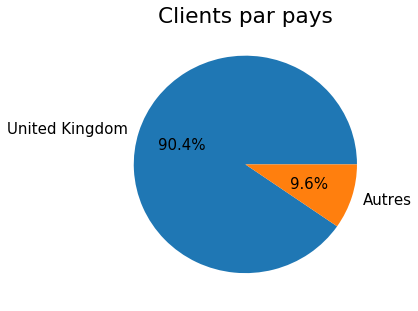

In [493]:
df_plot = df_customers[["Country", "InvoiceNo"]].groupby("Country").count()
df_plot.shape

df_plt_results = pd.DataFrame({'Clients': [df_plot.loc['United Kingdom'].values[0], df_plot.loc[~df_plot.index.isin(['United Kingdom'])].sum()[0]]},
                  index=['United Kingdom', 'Autres'])
plot = df_plt_results.plot.pie(y='Clients'
                               , figsize=(5, 5)
                               , autopct='%1.1f%%'
                                , title = 'Clients par pays'
                               , fontsize=15 
                               , legend = False)
plot = plt.ylabel('')


In [494]:
df_plot = df_customers[["Country", 'InvoiceNo', "TotalPrice sum"]].groupby("Country").agg({'InvoiceNo': 'count', 'TotalPrice sum':'sum'})
df_plot['Average spent'] = df_plot['TotalPrice sum']/df_plot['InvoiceNo']
df_plot[df_plot.InvoiceNo > 10].sort_values('Average spent')

,InvoiceNo,TotalPrice sum,Average spent
Country,,,
Italy,14,17483.240,1248.803
Portugal,19,29151.900,1534.311
Belgium,24,41551.260,1731.303
Finland,12,21994.880,1832.907
United Kingdom,3917,7265185.704,1854.783
Spain,28,60354.300,2155.511
France,87,199441.940,2292.436
Germany,94,226382.150,2408.321
Switzerland,20,56419.290,2820.965


In [495]:
df_plot = df_customers.groupby("CountryUK").agg(
    {'InvoiceNo': 'count'
     ,'InvoiceNo nunique':['mean', 'median']
     , 'TotalPrice sum':['sum', 'mean', 'median']
     , 'Quantity sum' : ['mean', 'median']
    })
df_plot

InvoiceNo InvoiceNo nunique        TotalPrice sum                    \
              count              mean median            sum     mean   median   
CountryUK                                                                       
False           418             4.452      2    1568603.260 3752.639 1025.700   
True           3917             4.240      2    7265185.704 1854.783  645.650   

          Quantity sum          
                  mean  median  
CountryUK                       
False         2178.608 524.500  
True          1081.034 365.000

In [496]:
df_customers['TotalPrice sum'].describe()

count     4335.000
mean      2037.783
std       8966.233
min          3.750
25%        306.290
50%        668.560
75%       1651.605
max     280206.020
Name: TotalPrice sum, dtype: float64

### Items graphs & stats

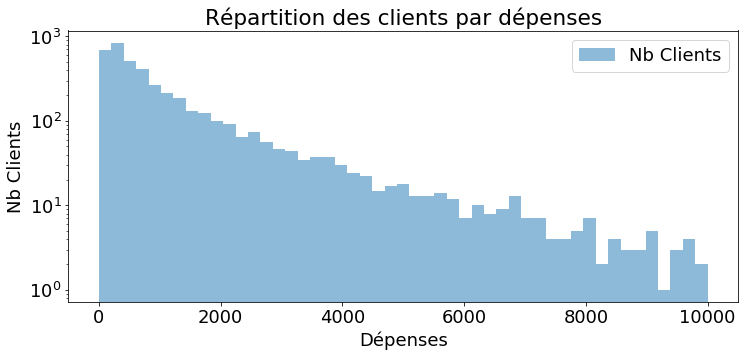

In [497]:

plt.rcParams["figure.figsize"] = (12,5)
#GRaph group repartition
nb_groups=2

df_plot = df_customers['TotalPrice sum'].values.round().round(0).astype(int)
df_plot = pd.DataFrame(df_plot, columns = ['Nb Clients'])
df_plot.plot.hist( bins =np.linspace(1, 10000, 50) ,histtype='bar', alpha =0.5)

plt.yscale('log')

legend(plt, 'Répartition des clients par dépenses', 'Dépenses', 'Nb Clients' )
plt.show()

## Quantile groups

In [498]:
def quantile_group(x,col,quantile_dict,reverse):
    quantile_dict = quantile_dict[col]
    if reverse == False:
        order = 0
    elif reverse == True:
        order = len(quantile_dict)+2
        
    group_num = 1
    for quant, val in quantile_dict.items():
        if x <= val:
            return abs(group_num-order)
        group_num+=1
        
    return abs(group_num-order)

In [499]:
nb_groups=4
#q = (11-np.logspace(1,0, nb_groups+1, base =10 )[1:-1])/10
q = np.linspace(0,1, nb_groups+1)[1:-1]
quantiles = df_customers[['Order_value_avg']].quantile(q=q).to_dict()
quantiles
df_customers['Group']  = df_customers['Order_value_avg'].apply(quantile_group, args=('Order_value_avg',quantiles,True))

{'Order_value_avg': {0.25: 1.8221334172435495,
  0.5: 4.385270270270271,
  0.75: 9.884016409845907}}

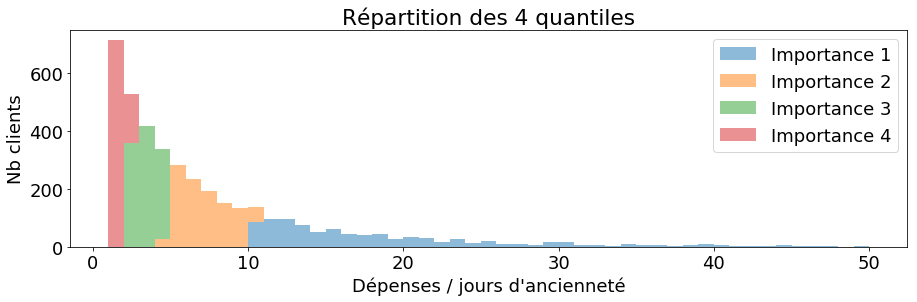

In [500]:
#GRaph group repartition
plt.rcParams["figure.figsize"] = (15,4)

df_plot=pd.DataFrame( np.ones((df_customers.groupby('Group').agg('count').values.max(),nb_groups)), columns=['Importance 1','Importance 2','Importance 3','Importance 4'])
for Group in range (1,5):
    vals = df_customers[df_customers['Group'] == Group]['Order_value_avg'].values.round().round(0).astype(int)
    df_plot.iloc[:len(vals),Group-1] = vals
    
df_plot.plot.hist( bins =np.linspace(1, 50, 50) ,histtype='bar', stacked=True, alpha=0.5)

legend(plt, 'Répartition des '+str(nb_groups)+' quantiles', 'Dépenses / jours d\'ancienneté', 'Nb clients')
plt.show()

{'Order_value': {0.25: 306.29, 0.5: 668.5600000000002, 0.75: 1651.605}}

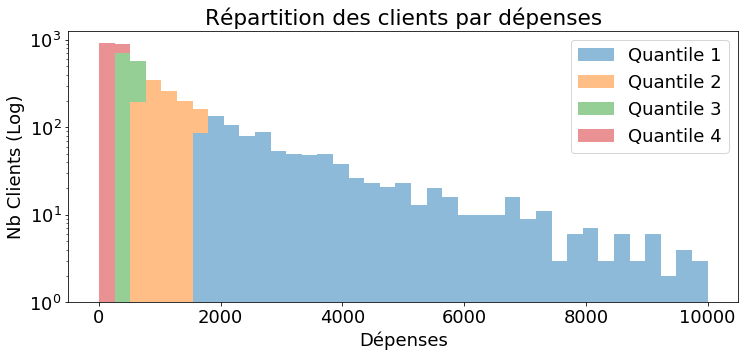

In [501]:
nb_groups=4
#q = (11-np.logspace(1,0, nb_groups+1, base =10 )[1:-1])/10
q = np.linspace(0,1, nb_groups+1)[1:-1]
quantiles = df_customers[['Order_value']].quantile(q=q).to_dict()
quantiles
df_customers['Quantile_CA']  = df_customers['Order_value'].apply(quantile_group, args=('Order_value',quantiles,True))

plt.rcParams["figure.figsize"] = (12,5)

df_plot=pd.DataFrame( np.ones((df_customers.groupby('Quantile_CA').agg('count').values.max(),nb_groups)), columns=['Quantile 1','Quantile 2','Quantile 3','Quantile 4'])
for Group in range (1,5):
    vals = df_customers[df_customers['Quantile_CA'] == Group]['Order_value'].values.round().round(0).astype(int)
    df_plot.iloc[:len(vals),Group-1] = vals
    

df_plot.plot.hist( bins =np.linspace(1, 10000, 40) ,histtype='bar',stacked=True, alpha =0.5)
plt.yscale('log')

legend(plt, 'Répartition des clients par dépenses', 'Dépenses', 'Nb Clients (Log)' )
plt.show()

In [502]:

df_customers = df_customers[df_customers['Month']<12]

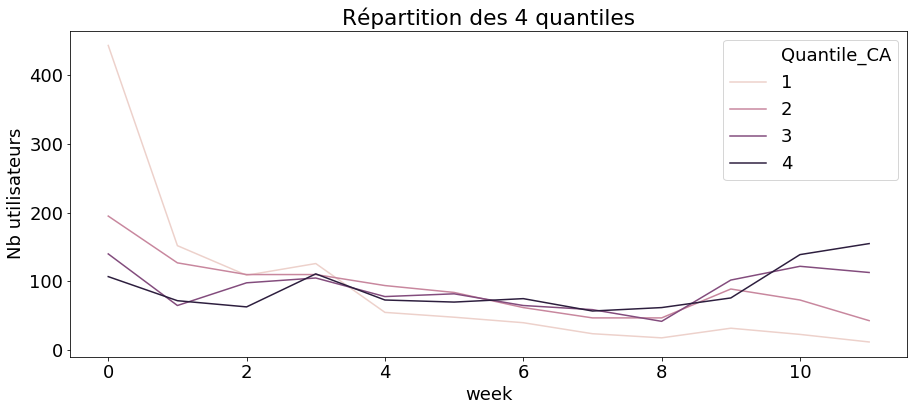

In [503]:
plt.rcParams["figure.figsize"] = (15,6)
f, axes = plt.subplots(1, 1)

df_plot = df_customers.groupby(['Quantile_CA', 'Month'] ).count().reset_index()
ax = sns.lineplot(x="Month", y='InvoiceNo', hue="Quantile_CA", data=df_plot)
silent = ax.set_title('Number of new customers per group around the year')

legend(plt, 'Répartition des '+str(nb_groups)+' quantiles', 'week', 'Nb utilisateurs')

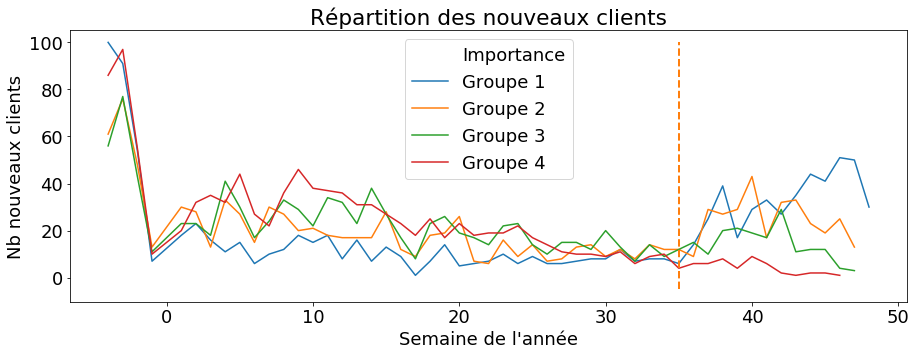

In [504]:
plt.rcParams["figure.figsize"] = (15,5)
f, axes = plt.subplots(1, 1)

df_plot = df_customers.groupby(['Group', 'Week'] ).count().reset_index()
df_plot['Importance'] = df_plot['Group'].apply(lambda x: 'Groupe '+str(x))
ax = sns.lineplot(x="Week", y='InvoiceNo', hue="Importance", data=df_plot)
silent = ax.set_title('Number of new customers per group around the year')

legend(plt, 'Répartition des nouveaux clients', 'Semaine de l\'année', 'Nb nouveaux clients')
plt.plot([35, 35], [-5,100], linewidth=2, linestyle='--' )

Week 35 (month 9) is starting to show growing gap between groups 

In [505]:
df_customers = df_customers[df_customers['Month']<9]

## Reset quantile group over smaller group

In [506]:
nb_groups=4
#q = (11-np.logspace(1,0, nb_groups+1, base =10 )[1:-1])/10
q = np.linspace(0,1, nb_groups+1)[1:-1]
quantiles = df_customers[['Order_value_avg']].quantile(q=q).to_dict()
quantiles
df_customers['Group']  = df_customers['Order_value_avg'].apply(quantile_group, args=('Order_value_avg',quantiles,True))

{'Order_value_avg': {0.25: 1.4244251308900522,
  0.5: 3.322912912912912,
  0.75: 7.5668657078215915}}

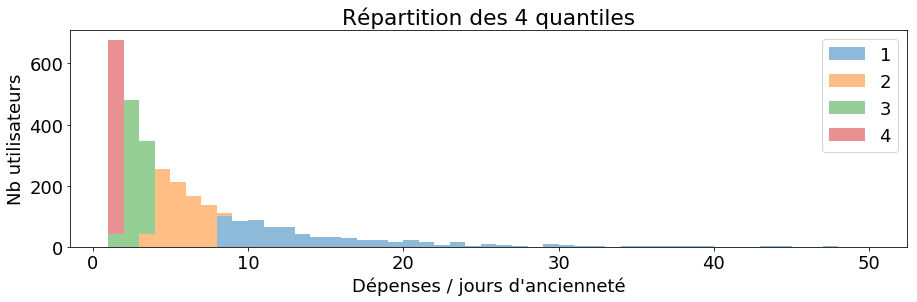

In [507]:
#GRaph group repartition
plt.rcParams["figure.figsize"] = (15,4)

df_plot=pd.DataFrame( np.ones((df_customers.groupby('Group').agg('count').values.max(),nb_groups)), columns=['1','2','3','4'])
for Group in range (1,5):
    vals = df_customers[df_customers['Group'] == Group]['Order_value_avg'].values.round().round(0).astype(int)
    df_plot.iloc[:len(vals),Group-1] = vals
    
df_plot.plot.hist( bins =np.linspace(1, 50, 50) ,histtype='bar', stacked=True, alpha=0.5)

legend(plt, 'Répartition des '+str(nb_groups)+' quantiles', 'Dépenses / jours d\'ancienneté', 'Nb utilisateurs')
plt.show()

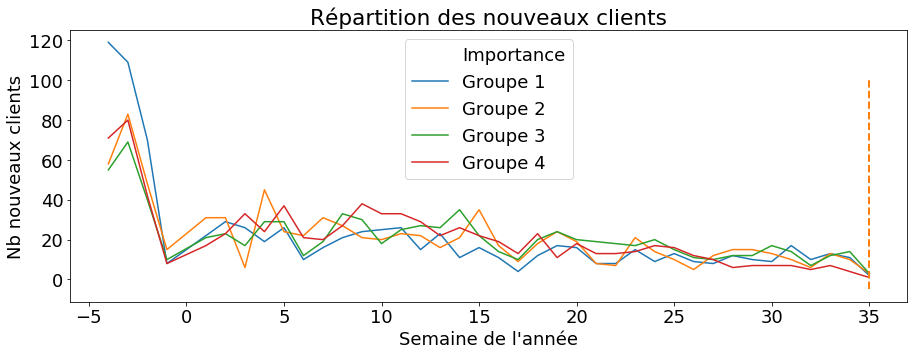

In [508]:
plt.rcParams["figure.figsize"] = (15,5)
f, axes = plt.subplots(1, 1)

df_plot = df_customers.groupby(['Group', 'Week'] ).count().reset_index()
df_plot['Importance'] = df_plot['Group'].apply(lambda x: 'Groupe '+str(x))
ax = sns.lineplot(x="Week", y='InvoiceNo', hue="Importance", data=df_plot)
legend(plt, 'Répartition des nouveaux clients', 'Semaine de l\'année', 'Nb nouveaux clients')
plt.plot([35, 35], [-5,100], linewidth=2, linestyle='--' )

In [509]:
#23

##### Note :bias for customers who arrived late in the year!
Should do something related to month

In [510]:
#24

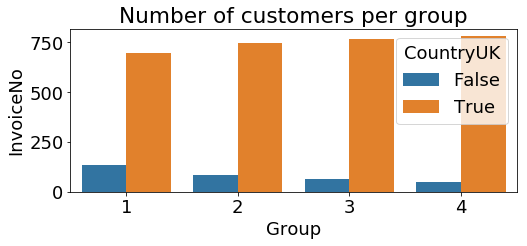

In [511]:
plt.rcParams["figure.figsize"] = (8,3)
f, axes = plt.subplots(1, 1)

df_plot = df_customers.groupby(['Group', 'CountryUK'] ).count().reset_index()
ax = sns.barplot(x="Group", y='InvoiceNo', hue="CountryUK", data=df_plot)
silent = ax.set_title('Number of customers per group')


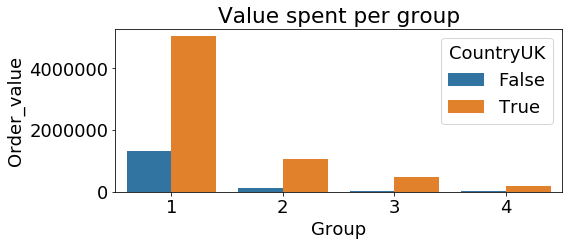

In [512]:
plt.rcParams["figure.figsize"] = (8,3)
f, axes = plt.subplots(1, 1)

df_plot = df_customers[['Group', 'Order_value', 'CountryUK']].groupby(['Group', 'CountryUK'] ).sum().reset_index()
ax = sns.barplot(x="Group", y='Order_value', hue="CountryUK", data=df_plot)
silent = ax.set_title('Value spent per group')

## Testing models

 setting X and y

In [513]:
df_customers.head(1)

,InvoiceNo,InvoiceNo nunique,TotalPrice sum,TotalPrice mean,Quantity sum,ItemID nunique,InvoiceDate,InvoiceDate last,InvoiceDate days_since_last_order,InvoiceDate days_since_first_order,Month,Week,Time,Country,Client,CountryUK,days_active,firstorder_CustomerID,firstorder_CountryUK,firstorder_Country_GPD,firstorder_TotalPrice,firstorder_Quantity,firstorder_UnitPrice_avg,firstorder_UnitPrice_max,firstorder_Week,firstorder_Time,firstorder_Distinct_items_count,firstorder_FirstInvoice,Order_value,Order_value_avg,Group,Quantile_CA
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12346.000,541431,1,77183.600,77183.600,74215,1,2011-01-18 10:01:00,2011-01-18 10:01:00,325,325,1,3,10.017,United Kingdom,4325,True,0,12346.000,True,43620.000,77183.600,74215,1.040,1.040,3,10.017,1,541431,77183.600,237.488,1,1


In [514]:
df_customers_country.index=df_customers_country.index.astype('int')

In [541]:
X = df_first_order[df_first_order['CustomerID'].isin(df_customers.index)].sort_values(by='CustomerID')
X.index = X.CustomerID
X = X.join(df_customers_country)
#X = X.join(df_first_items, on ='FirstInvoice')
X = X[[  'TotalPrice', 'Quantity', 'UnitPrice_avg',
       'Week',  'Distinct_items_count']]
# old : X = df_customers[['firstorder_TotalPrice', 'firstorder_Quantity', 'firstorder_UnitPrice' ,'firstorder_Week', 'CountryUK']]
#X = df_customers[['firstorder_TotalPrice', 'firstorder_Quantity', 'firstorder_UnitPrice' ,'firstorder_Week', 'CountryUK']]
y = df_customers.sort_values(by='CustomerID')['Group']
X.shape
y.shape

(3315, 5)

(3315,)

In [542]:
X.columns

Index(['TotalPrice', 'Quantity', 'UnitPrice_avg', 'Week',
       'Distinct_items_count'],
      dtype='object')

#### Dividing between Test set and Train set

In [613]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y )

In [614]:
X_train.size

12430

#### Cross correlations

Text(0.5,1,'Tableau de Correlation')

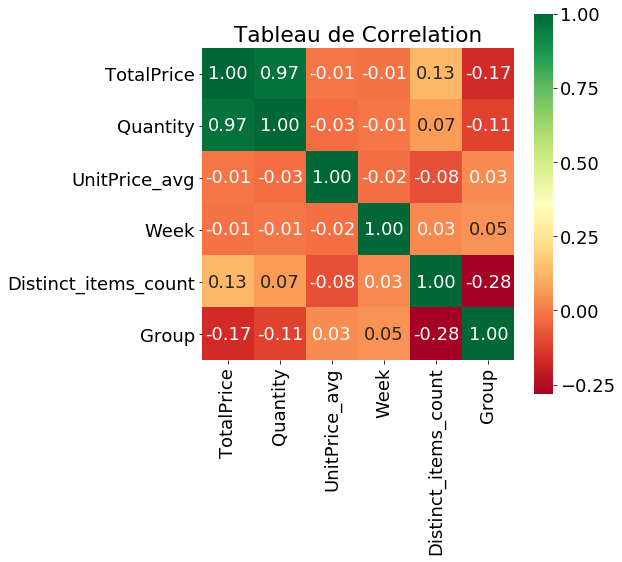

In [615]:
if len(X.columns) < 20 :
    plt.rcParams["figure.figsize"] = (7,7)
    xy = pd.concat([X, y], axis=1, join='inner')
    fig = sns.heatmap(xy.corr(), annot = True,fmt = ".2f",square=True, cmap='RdYlGn')
    plt.title('Tableau de Correlation')
else:
    print('Too many columns for corr display')

### KNeighborsClassifier

In [616]:
knn = KNeighborsClassifier(n_neighbors = 45)

Highest score is 0.43346932563528534 Hyperparam  n_neighbors : 14
14
Highest score is 0.43316821151303303 Hyperparam  n_neighbors : 28
28
Highest score is 0.42954175012764617 Hyperparam  n_neighbors : 29
29
Highest score is 0.4325717109828103 Hyperparam  n_neighbors : 12
12


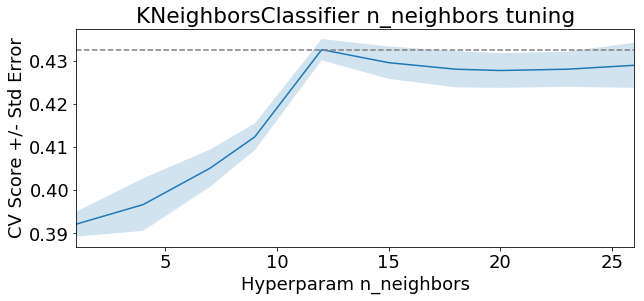

In [617]:
knn.n_neighbors = int(round(hyper_param(knn, X, y)))

In [618]:
%timeit for _ in range(10):silent = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Score of :',knn.score(X_test, y_test))

print(classification_report(y_test, y_pred))


15 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Score of : 0.4330518697225573
             precision    recall  f1-score   support

          1       0.48      0.58      0.53       207
          2       0.34      0.33      0.33       207
          3       0.35      0.27      0.31       207
          4       0.52      0.55      0.54       208

avg / total       0.42      0.43      0.43       829



## Logistic Regression

In [619]:
logreg = LogisticRegression(penalty  = 'l1')
%timeit for _ in range(10):silent = logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('Score of :',logreg.score(X_test, y_test))
print(classification_report(y_test, y_pred))


154 ms ± 847 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Score of : 0.4632086851628468
             precision    recall  f1-score   support

          1       0.51      0.61      0.56       207
          2       0.40      0.20      0.27       207
          3       0.38      0.29      0.33       207
          4       0.49      0.75      0.59       208

avg / total       0.45      0.46      0.44       829



### DecisionTreeClassifier


In [620]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

Highest score is 0.4461300289331396 Hyperparam  max_depth : 4
4
Highest score is 0.4461300289331396 Hyperparam  max_depth : 4
4


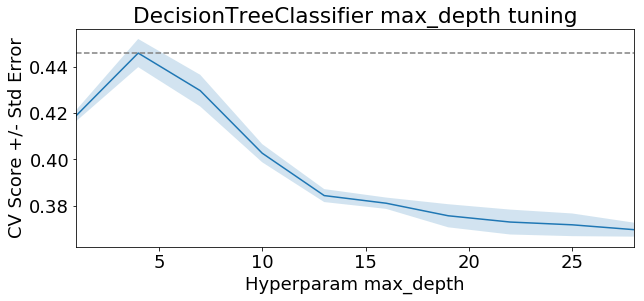

Highest score is 0.4461300289331396 Hyperparam  min_samples_split : 2
2
Highest score is 0.4461300289331396 Hyperparam  min_samples_split : 2
2


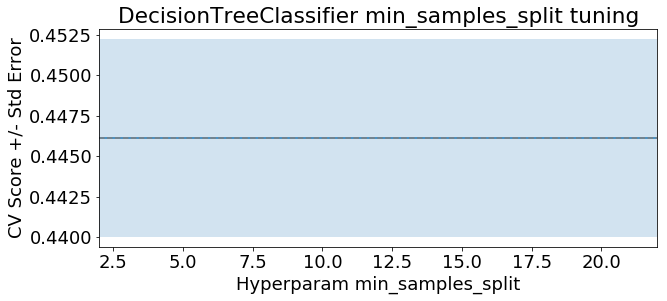

Highest score is 0.4515599020724507 Hyperparam  min_samples_leaf : 31
31
Highest score is 0.45095603733815115 Hyperparam  min_samples_leaf : 25
25


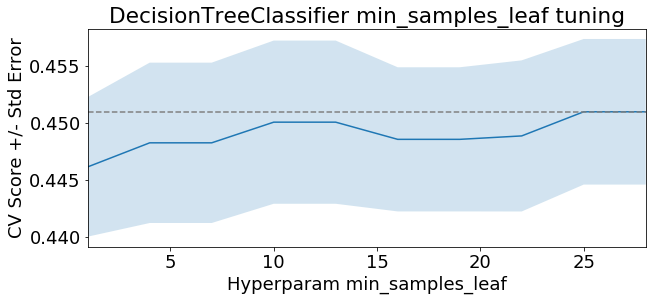

In [621]:
model.max_depth = hyper_param(model, X, y, 'max_depth')
model.min_samples_split = hyper_param(model, X, y, 'min_samples_split')
model.min_samples_leaf = hyper_param(model, X, y, 'min_samples_leaf')


In [622]:
%timeit for _ in range(10):silent = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Score of :',model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

30.4 ms ± 409 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Score of : 0.44752714113389624
             precision    recall  f1-score   support

          1       0.56      0.54      0.55       207
          2       0.31      0.35      0.33       207
          3       0.46      0.06      0.10       207
          4       0.48      0.84      0.61       208

avg / total       0.45      0.45      0.40       829



# Random forests

In [639]:
rf = RandomForestClassifier()

Highest score is 0.43951288244766507 Hyperparam  n_estimators : 41
41
Highest score is 0.44465064215859545 Hyperparam  n_estimators : 33
33


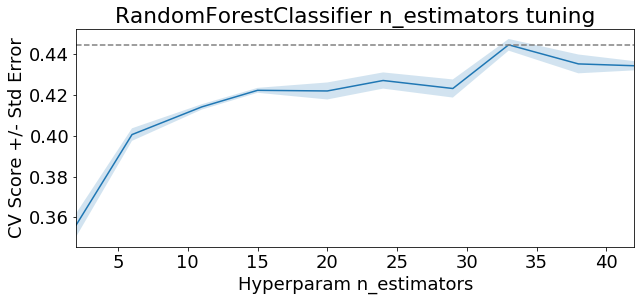

Highest score is 0.4576124595787021 Hyperparam  max_depth : 8
8
Highest score is 0.4560962517837739 Hyperparam  max_depth : 7
7


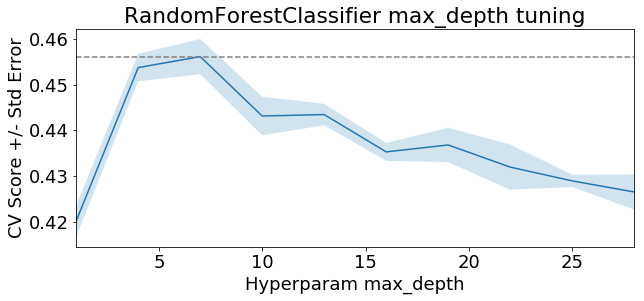

In [640]:
rf.n_estimators = hyper_param(rf, X, y, 'n_estimators')
rf.max_depth = hyper_param(rf, X, y, 'max_depth')


Highest score is 0.46242128484086775 Hyperparam  min_samples_split : 15
15
Highest score is 0.45670093476297086 Hyperparam  min_samples_split : 20
20
Highest score is 0.4639424021051804 Hyperparam  min_samples_split : 14
14


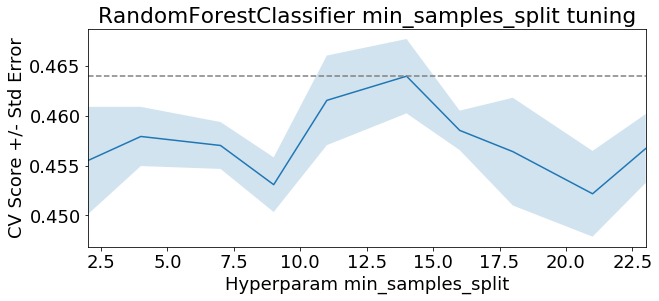

Highest score is 0.46423860675804823 Hyperparam  min_samples_leaf : 4
4
Highest score is 0.4630316955343467 Hyperparam  min_samples_leaf : 4
4


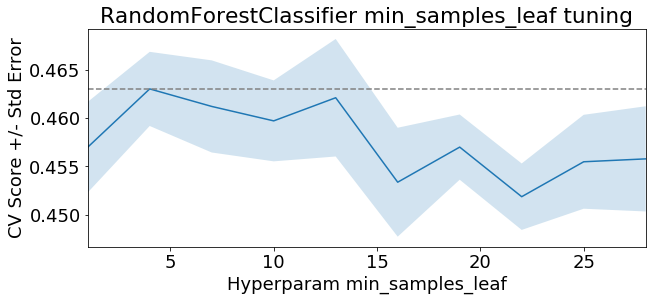

In [641]:
rf.min_samples_split = hyper_param(rf, X, y, 'min_samples_split')
rf.min_samples_leaf = hyper_param(rf, X, y, 'min_samples_leaf')


In [642]:
rf.max_features  = 'sqrt'

In [645]:
%timeit for _ in range(10):silent = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print('Score of :',rf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

693 ms ± 6.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Score of : 0.45476477683956573
             precision    recall  f1-score   support

          1       0.55      0.55      0.55       207
          2       0.34      0.33      0.33       207
          3       0.39      0.31      0.35       207
          4       0.51      0.63      0.57       208

avg / total       0.45      0.45      0.45       829



In [628]:
nb_features_to_keep = 7
df_features_importance = pd.DataFrame(rf.feature_importances_, index =X.columns, columns =['Importance'])

#df_features_importance.loc['United Kingdom']
df_features_importance.sort_values(by='Importance', ascending=False).head(10)

,Importance
TotalPrice,0.519
Quantity,0.289
Distinct_items_count,0.097
Week,0.049
UnitPrice_avg,0.046


In [629]:
#Reducing dimensions
#return
##X=X[df_features_importance.sort_values(by=0, ascending=False).head(nb_features_to_keep).index]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y )

In [630]:
rf.estimators_[1]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=931208158, splitter='best')

In [655]:
joblib.dump(rf, 'exported_rf_model.joblib') 

['exported_rf_model.joblib']

## Visualize tree

In [365]:
# Extract single tree
estimator = rf.estimators_[1]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = '1234',
                rounded = True, proportion = False, 
                precision = 2, filled = True
               )


In [366]:
##! Not working. did it manually :
# cd C:\Users\Maly-Fenix\OC_Project5;dot -Tpng tree.dot -o tree.png -Gdpi=400

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400'],  shell=True)

0

### Display the tree

In [401]:
# Display in jupyter notebook
from IPython.display import Image
#Image(filename = 'tree.png')

## Visualize results

In [646]:
df_results =pd.DataFrame(X_test, columns =X.columns )
df_results['Predicted'] = y_pred
df_results['Group'] = y_test.values

In [647]:
df_results.head(3)

,TotalPrice,Quantity,UnitPrice_avg,Week,Distinct_items_count,Predicted,Group
CustomerID,,,,,,,
12394.000,381.080,182,3.015,18,21,2,2
17193.000,299.040,96,3.115,24,4,3,1
17758.000,583.790,407,2.052,13,68,1,1


In [648]:
from sklearn.metrics import confusion_matrix

In [649]:
y_test.shape

(829,)

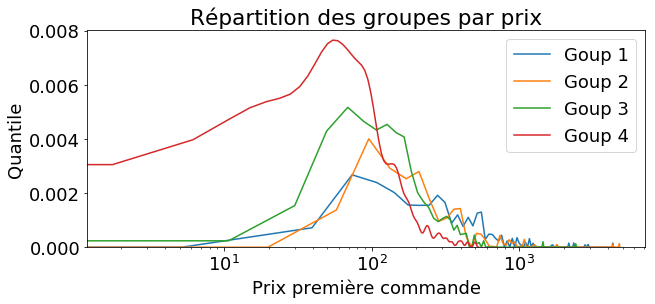

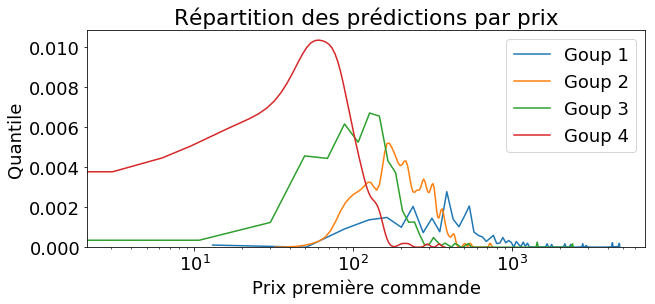

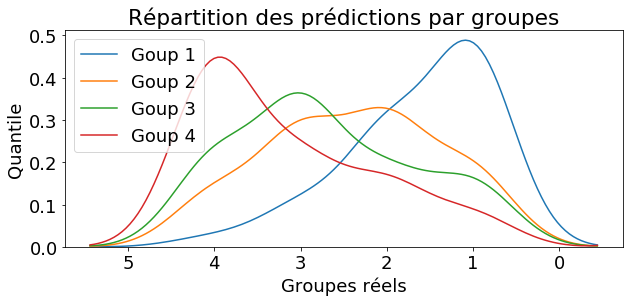

In [650]:
price_col = 'Quantity'

for Group in range (1,5):
    silent = sns.kdeplot(df_results[df_results['Group']==Group][price_col], bw = 10, label = 'Goup '+str(Group))

plt.xscale('log')
legend(plt, 'Répartition des groupes par prix', 'Prix première commande', 'Quantile')
plt.show()


for Predicted in range (1,5):
    silent = sns.kdeplot(df_results[df_results['Predicted']==Predicted][price_col], bw = 10, label = 'Goup '+str(Predicted))

plt.xscale('log')
legend(plt, 'Répartition des prédictions par prix', 'Prix première commande', 'Quantile')
plt.show()

for Predicted in range (1,5):
    silent = sns.kdeplot(df_results[df_results['Predicted']==Predicted]['Group'], bw = .48, label = 'Goup '+str(Predicted))
    
legend(plt, 'Répartition des prédictions par groupes', 'Groupes réels', 'Quantile')
plt.gca().invert_xaxis()
plt.show()


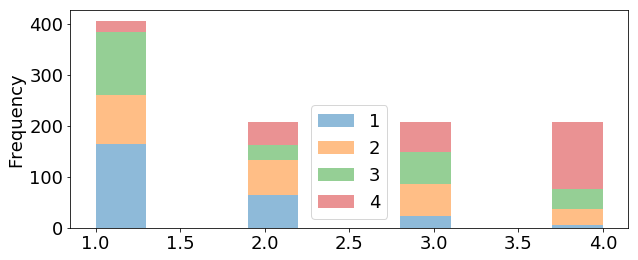

In [651]:

df_plot=pd.DataFrame( np.ones((df_results.groupby('Predicted').agg('count').values.max(),nb_groups)), columns=['1','2','3','4'])
for Predicted in range (1,5):
    vals = df_results[df_results['Predicted'] == Predicted]['Group'].values.round().round(0).astype(int)
    df_plot.iloc[:len(vals),Predicted-1] = vals
    
df_plot.plot.hist( histtype='bar', stacked=True, alpha=0.5, align='mid')

#legend(plt, 'Répartition des '+str(nb_groups)+' quantiles', 'Dépenses / ancienneté', 'Nb utilisateurs')
plt.show()

## Analyze results

In [652]:
df_detail_results = df_results.join(df_customers, rsuffix ='customer')

In [653]:
cm = confusion_matrix(y_test, y_pred, labels =[1,2,3,4])

Normalized confusion matrix
[[0.54589372 0.20289855 0.14009662 0.11111111]
 [0.30917874 0.32850242 0.14975845 0.21256039]
 [0.11111111 0.29951691 0.30917874 0.28019324]
 [0.02884615 0.14423077 0.19230769 0.63461538]]


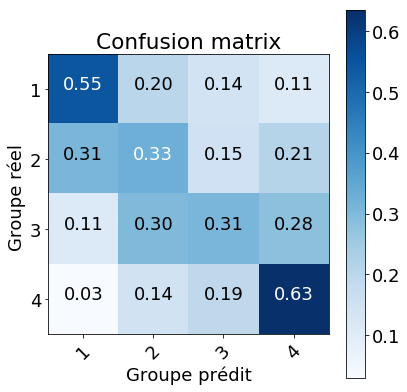

In [654]:
plt.rcParams["figure.figsize"] = (6,6)
silent =plot_confusion_matrix(cm, [1,2,3,4], True)

#### Small clients predicted as big

In [407]:
df_analyze = df_detail_results.query('Group ==4 and Predicted ==1')#['InvoiceDate days_since_first_order', 'InvoiceNo nunique']
df_analyze
df_analyze.describe(include='all')

,CountryUK,TotalPrice,Quantity,UnitPrice_avg,UnitPrice_max,Week,Time,Distinct_items_count,Predicted,Group,InvoiceNo,InvoiceNo nunique,TotalPrice sum,TotalPrice mean,Quantity sum,ItemID nunique,InvoiceDate,InvoiceDate last,InvoiceDate days_since_last_order,InvoiceDate days_since_first_order,Month,Weekcustomer,Timecustomer,Country,Client,CountryUKcustomer,CountrySwitz,days_active,firstorder_CustomerID,firstorder_CountryUK,firstorder_TotalPrice,firstorder_Quantity,firstorder_UnitPrice_avg,firstorder_UnitPrice_max,firstorder_Week,firstorder_Time,firstorder_Distinct_items_count,firstorder_FirstInvoice,Order_value,Order_value_avg,Groupcustomer,Quantile_CA
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13506.000,True,301.120,232,2.835,9.950,-4,12.250,17,1,4,537129,2,458.520,17.635,324,26,2010-12-05 12:15:00,2011-01-27 13:53:00,315,369,0,-4,12.250,United Kingdom,1660,True,False,54,13506.000,True,301.120,232,2.835,9.950,-4,12.250,17,537129,458.520,1.243,4,3
16125.000,True,289.350,124,3.209,7.950,-3,15.800,13,1,4,537650,1,289.350,22.258,124,13,2010-12-07 15:48:00,2010-12-07 15:48:00,366,366,0,-3,15.800,United Kingdom,1003,True,False,0,16125.000,True,289.350,124,3.209,7.950,-3,15.800,13,537650,289.350,0.791,4,4
14142.000,True,311.810,313,1.770,8.500,-4,16.550,22,1,4,536587,1,311.810,14.173,313,22,2010-12-01 16:33:00,2010-12-01 16:33:00,372,372,0,-4,16.550,United Kingdom,1128,True,False,0,14142.000,True,311.810,313,1.770,8.500,-4,16.550,22,536587,311.810,0.838,4,3
17226.000,True,393.490,406,2.575,12.750,5,11.867,21,1,4,543190,1,393.490,18.738,406,21,2011-02-04 11:52:00,2011-02-04 11:52:00,308,308,2,5,11.867,United Kingdom,1468,True,False,0,17226.000,True,393.490,406,2.575,12.750,5,11.867,21,543190,393.490,1.278,4,3
17978.000,True,300.920,499,2.363,7.950,-3,14.083,12,1,4,538068,1,300.920,25.077,499,12,2010-12-09 14:05:00,2010-12-09 14:05:00,364,364,0,-3,14.083,United Kingdom,1051,True,False,0,17978.000,True,300.920,499,2.363,7.950,-3,14.083,12,538068,300.920,0.827,4,4
15326.000,True,311.710,386,1.452,4.950,2,11.633,29,1,4,540604,1,311.710,10.749,386,29,2011-01-10 11:38:00,2011-01-10 11:38:00,333,333,1,2,11.633,United Kingdom,1127,True,False,0,15326.000,True,311.710,386,1.452,4.950,2,11.633,29,540604,311.710,0.936,4,3
17525.000,True,422.700,82,6.006,7.950,-2,12.083,9,1,4,538994,1,422.700,46.967,82,9,2010-12-15 12:05:00,2010-12-15 12:05:00,359,359,0,-2,12.083,United Kingdom,1573,True,False,0,17525.000,True,422.700,82,6.006,7.950,-2,12.083,9,538994,422.700,1.177,4,3


,CountryUK,TotalPrice,Quantity,UnitPrice_avg,UnitPrice_max,Week,Time,Distinct_items_count,Predicted,Group,InvoiceNo,InvoiceNo nunique,TotalPrice sum,TotalPrice mean,Quantity sum,ItemID nunique,InvoiceDate,InvoiceDate last,InvoiceDate days_since_last_order,InvoiceDate days_since_first_order,Month,Weekcustomer,Timecustomer,Country,Client,CountryUKcustomer,CountrySwitz,days_active,firstorder_CustomerID,firstorder_CountryUK,firstorder_TotalPrice,firstorder_Quantity,firstorder_UnitPrice_avg,firstorder_UnitPrice_max,firstorder_Week,firstorder_Time,firstorder_Distinct_items_count,firstorder_FirstInvoice,Order_value,Order_value_avg,Groupcustomer,Quantile_CA
count,7,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7,7.000,7.000,7.000,7.000,7.000,7,7,7.000,7.000,7.000,7.000,7.000,7,7.000,7,7,7.000,7.000,7,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7,7.000,7.000,7.000,7.000
unique,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,7,nan,nan,nan,nan,nan,7,7,nan,nan,nan,nan,nan,1,nan,1,1,nan,7.000,1,nan,nan,nan,nan,nan,nan,nan,7,nan,nan,nan,nan
top,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,538994,nan,nan,nan,nan,nan,2010-12-07 15:48:00,2010-12-07 15:48:00,nan,nan,nan,nan,nan,United Kingdom,nan,True,False,nan,15326.000,True,nan,nan,nan,nan,nan,nan,nan,538994,nan,nan,nan,nan
freq,7,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,1,1,nan,nan,nan,nan,nan,7,nan,7,7,nan,1.000,7,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan
first,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,2010-12-01 16:33:00,2010-12-01 16:33:00,nan,nan,nan,nan,nan,NaN,nan,NaN,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan
last,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,2011-02-04 11:52:00,2011-02-04 11:52:00,nan,nan,nan,nan,nan,NaN,nan,NaN,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan
mean,NaN,333.014,291.714,2.887,8.571,-1.286,13.467,17.571,1.000,4.000,NaN,1.143,355.500,22.228,304.857,18.857,NaN,NaN,345.286,353.000,0.429,-1.286,13.467,NaN,1287.143,NaN,NaN,7.714,nan,NaN,333.014,291.714,2.887,8.571,-1.286,13.467,17.571,NaN,355.500,1.013,4.000,3.286
std,NaN,52.533,153.322,1.501,2.368,3.450,2.027,6.925,0.000,0.000,NaN,0.378,68.011,11.903,151.279,7.603,NaN,NaN,26.266,23.692,0.787,3.450,2.027,NaN,271.084,NaN,NaN,20.410,nan,NaN,52.533,153.322,1.501,2.368,3.450,2.027,6.925,NaN,68.011,0.212,0.000,0.488
min,NaN,289.350,82.000,1.452,4.950,-4.000,11.633,9.000,1.000,4.000,NaN,1.000,289.350,10.749,82.000,9.000,NaN,NaN,308.000,308.000,0.000,-4.000,11.633,NaN,1003.000,NaN,NaN,0.000,nan,NaN,289.350,82.000,1.452,4.950,-4.000,11.633,9.000,NaN,289.350,0.791,4.000,3.000
25%,NaN,301.020,178.000,2.067,7.950,-3.500,11.975,12.500,1.000,4.000,NaN,1.000,306.315,15.904,218.500,12.500,NaN,NaN,324.000,346.000,0.000,-3.500,11.975,NaN,1089.000,NaN,NaN,0.000,nan,NaN,301.020,178.000,2.067,7.950,-3.500,11.975,12.500,NaN,306.315,0.832,4.000,3.000


Conclusion : They have very low amount of invoices. (1 or 2) <br> Big first order. <br> Old clients with no new orders 

#### Big clients predicted as small

In [413]:
df_analyze = df_detail_results.query('Group ==1 and Predicted ==4')
df_analyze.head(5)
df_analyze.describe(include='all')

,CountryUK,TotalPrice,Quantity,UnitPrice_avg,UnitPrice_max,Week,Time,Distinct_items_count,Predicted,Group,InvoiceNo,InvoiceNo nunique,TotalPrice sum,TotalPrice mean,Quantity sum,ItemID nunique,InvoiceDate,InvoiceDate last,InvoiceDate days_since_last_order,InvoiceDate days_since_first_order,Month,Weekcustomer,Timecustomer,Country,Client,CountryUKcustomer,CountrySwitz,days_active,firstorder_CustomerID,firstorder_CountryUK,firstorder_TotalPrice,firstorder_Quantity,firstorder_UnitPrice_avg,firstorder_UnitPrice_max,firstorder_Week,firstorder_Time,firstorder_Distinct_items_count,firstorder_FirstInvoice,Order_value,Order_value_avg,Groupcustomer,Quantile_CA
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12712.000,False,175.530,60,5.182,18.000,-4,14.500,9,4,1,536983,13,4396.130,33.054,1062,58,2010-12-03 14:30:00,2011-11-11 08:19:00,28,370,0,-4,14.500,Germany,4012,False,False,342,12712.000,False,175.530,60,5.182,18.000,-4,14.500,9,536983,4396.130,11.881,1,1
14397.000,True,165.440,184,2.001,7.950,19,12.417,11,4,1,552575,19,2612.960,30.034,1890,18,2011-05-10 12:25:00,2011-12-07 09:22:00,2,213,5,19,12.417,United Kingdom,3674,True,False,211,14397.000,True,165.440,184,2.001,7.950,19,12.417,11,552575,2612.960,12.267,1,1
17809.000,True,34.800,24,1.450,1.450,-4,9.683,1,4,1,536380,12,5411.910,88.720,2057,48,2010-12-01 09:41:00,2011-11-23 12:59:00,15,373,0,-4,9.683,United Kingdom,4092,True,False,358,17809.000,True,34.800,24,1.450,1.450,-4,9.683,1,536380,5411.910,14.509,1,1
18225.000,True,30.000,16,2.500,3.750,-3,15.767,2,4,1,538125,12,5504.960,20.465,3242,152,2010-12-09 15:46:00,2011-12-06 13:27:00,2,364,0,-3,15.767,United Kingdom,4099,True,False,362,18225.000,True,30.000,16,2.500,3.750,-3,15.767,2,538125,5504.960,15.124,1,1
15555.000,True,198.430,293,0.821,1.690,-4,14.750,32,4,1,537204,16,4791.870,5.415,4397,405,2010-12-05 14:45:00,2011-11-27 16:19:00,11,368,0,-4,14.750,United Kingdom,4047,True,False,357,15555.000,True,198.430,293,0.821,1.690,-4,14.750,32,537204,4791.870,13.021,1,1


,CountryUK,TotalPrice,Quantity,UnitPrice_avg,UnitPrice_max,Week,Time,Distinct_items_count,Predicted,Group,InvoiceNo,InvoiceNo nunique,TotalPrice sum,TotalPrice mean,Quantity sum,ItemID nunique,InvoiceDate,InvoiceDate last,InvoiceDate days_since_last_order,InvoiceDate days_since_first_order,Month,Weekcustomer,Timecustomer,Country,Client,CountryUKcustomer,CountrySwitz,days_active,firstorder_CustomerID,firstorder_CountryUK,firstorder_TotalPrice,firstorder_Quantity,firstorder_UnitPrice_avg,firstorder_UnitPrice_max,firstorder_Week,firstorder_Time,firstorder_Distinct_items_count,firstorder_FirstInvoice,Order_value,Order_value_avg,Groupcustomer,Quantile_CA
count,35,35.000,35.000,35.000,35.000,35.000,35.000,35.000,35.000,35.000,35,35.000,35.000,35.000,35.000,35.000,35,35,35.000,35.000,35.000,35.000,35.000,35,35.000,35,35,35.000,35.000,35,35.000,35.000,35.000,35.000,35.000,35.000,35.000,35,35.000,35.000,35.000,35.000
unique,2,nan,nan,nan,nan,nan,nan,nan,nan,nan,35,nan,nan,nan,nan,nan,35,35,nan,nan,nan,nan,nan,3,nan,2,1,nan,35.000,2,nan,nan,nan,nan,nan,nan,nan,35,nan,nan,nan,nan
top,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,563372,nan,nan,nan,nan,nan,2011-08-19 13:33:00,2011-11-23 14:52:00,nan,nan,nan,nan,nan,United Kingdom,nan,True,False,nan,17811.000,True,nan,nan,nan,nan,nan,nan,nan,563372,nan,nan,nan,nan
freq,30,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,1,1,nan,nan,nan,nan,nan,30,nan,30,35,nan,1.000,30,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,nan,nan
first,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,2010-12-01 09:41:00,2011-09-04 13:48:00,nan,nan,nan,nan,nan,NaN,nan,NaN,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan
last,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,2011-08-19 13:33:00,2011-12-09 09:38:00,nan,nan,nan,nan,nan,NaN,nan,NaN,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan
mean,NaN,161.017,79.543,7.910,18.195,3.000,13.069,17.486,4.000,1.000,NaN,16.486,5784.758,33.166,2804.714,189.657,NaN,NaN,15.886,322.914,1.343,3.000,13.069,NaN,3889.629,NaN,NaN,307.029,nan,NaN,161.017,79.543,7.910,18.195,3.000,13.069,17.486,NaN,5784.758,17.397,1.000,1.057
std,NaN,68.955,58.644,24.868,39.270,10.652,2.112,15.382,0.000,0.000,NaN,15.732,5606.143,37.797,2127.984,172.023,NaN,NaN,22.244,74.470,2.351,10.652,2.112,NaN,401.994,NaN,NaN,85.449,nan,NaN,68.955,58.644,24.868,39.270,10.652,2.112,15.382,NaN,5606.143,16.212,0.000,0.236
min,NaN,5.900,1.000,0.821,1.450,-4.000,7.800,1.000,4.000,1.000,NaN,2.000,877.440,4.507,315.000,4.000,NaN,NaN,0.000,111.000,0.000,-4.000,7.800,NaN,2524.000,NaN,NaN,23.000,nan,NaN,5.900,1.000,0.821,1.450,-4.000,7.800,1.000,NaN,877.440,7.577,1.000,1.000
25%,NaN,126.425,46.000,2.308,4.600,-4.000,11.925,4.500,4.000,1.000,NaN,9.500,3019.315,8.580,1659.500,76.000,NaN,NaN,3.000,303.500,0.000,-4.000,11.925,NaN,3787.500,NaN,NaN,285.500,nan,NaN,126.425,46.000,2.308,4.600,-4.000,11.925,4.500,NaN,3019.315,9.599,1.000,1.000


Lots of orders (10 to 100)

## Gradient boosting

In [632]:
model = GradientBoostingClassifier()

Highest score is 0.4563900017019494 Hyperparam  n_estimators : 28
28


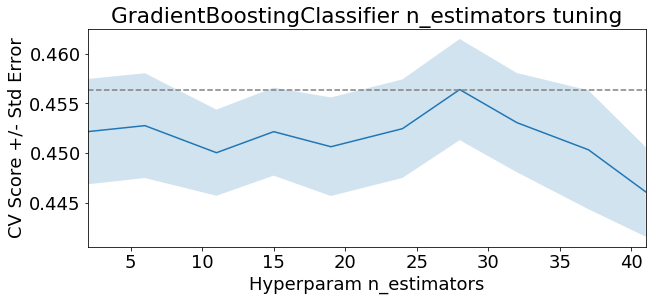

In [633]:
model.n_estimators = hyper_param(model, X, y, 'n_estimators')


Highest score is 0.4563900017019494 Hyperparam  learning_rate : 0.1
0.1
Highest score is 0.45548011337601296 Hyperparam  learning_rate : 0.09444444444444444
0.09444444444444444
Highest score is 0.4542838393359779 Hyperparam  learning_rate : 0.10666666666666667
0.10666666666666667


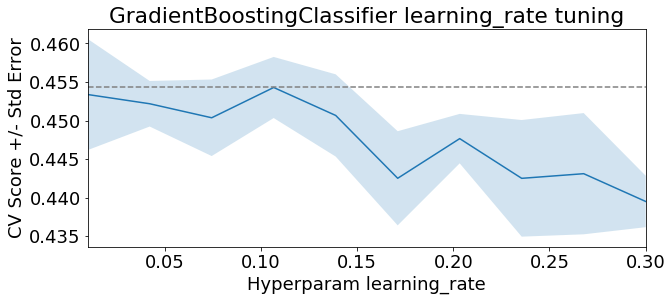

In [634]:
model.learning_rate  = hyper_param(model, X, y, 'learning_rate')

In [635]:
%timeit for _ in range(10):silent = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(model.__class__.__name__,'score of :',round(model.score(X_test, y_test)*1000)/1000)
print(classification_report(y_test, y_pred))

1.49 s ± 18.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
GradientBoostingClassifier score of : 0.445
             precision    recall  f1-score   support

          1       0.52      0.57      0.54       207
          2       0.31      0.22      0.25       207
          3       0.38      0.31      0.34       207
          4       0.49      0.68      0.57       208

avg / total       0.43      0.45      0.43       829



## Retry with Scaler (no changes)

In [ ]:
std_s = StandardScaler()
X_transformed = std_s.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2, random_state=42, stratify=y )

In [ ]:
knn = KNeighborsClassifier()
knn.n_neighbors = int(round(hyper_param(knn, X, y)))


In [ ]:
silent = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('Score of :',knn.score(X_test, y_test))
print(classification_report(y_test, y_pred))